## A Tutorial on Using Signver Signature Localizer Module 

In [14]:
from signver.detector import Detector
from signver.utils import data_utils, visualization_utils
from signver.utils.data_utils import invert_img
from signver.utils.visualization_utils import plot_np_array, visualize_boxes, get_image_crop

import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt

## Instantiate the Detector Module and Load a Model

In [2]:
model_path = "models/detector/ssd640fpnlite/saved_model"
detector = Detector()
detector.load(model_path)

## Download a Random Image and Invert It

In [3]:
file_url = "https://magazine.art21.org/wp-content/uploads/2009/06/signed-document-by-nam-june-paik-from-the-imas-historical-files.jpg"
file_url_2="https://swimmingfreestyle.net/wp-content/uploads/2019/10/contract-signature-page-example-new-elgin-munity-college-faculty-association-eccfa-of-contract-signature-page-example.png"
file_name = "signdoc.jpg" 
destination_dir = "data/test/localizer"
img_path = data_utils.download_file(file_url, file_name,  destination_dir) 

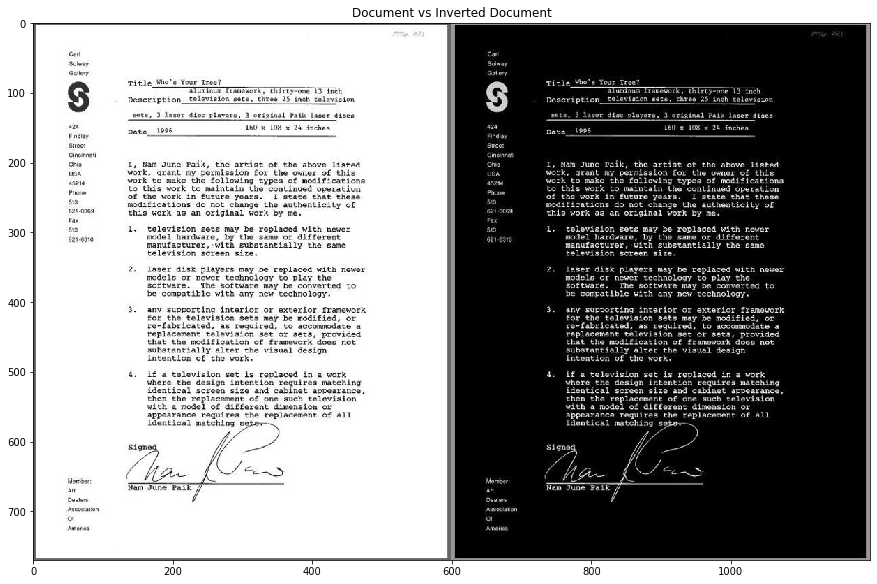

In [4]:
image_np = data_utils.img_to_np_array(img_path)
inverted_image_np = data_utils.invert_img(image_np) 

img_tensor = tf.convert_to_tensor(inverted_image_np)
img_tensor = img_tensor[tf.newaxis, ...]

plot_np_array( np.concatenate((image_np, inverted_image_np ), axis = 1), plot_title="Document vs Inverted Document")

## Get Localization Predictions on Inverted Image

In [5]:
boxes, scores, classes, detections = detector.detect(img_tensor)

## Visualize Signature Localization Predictions

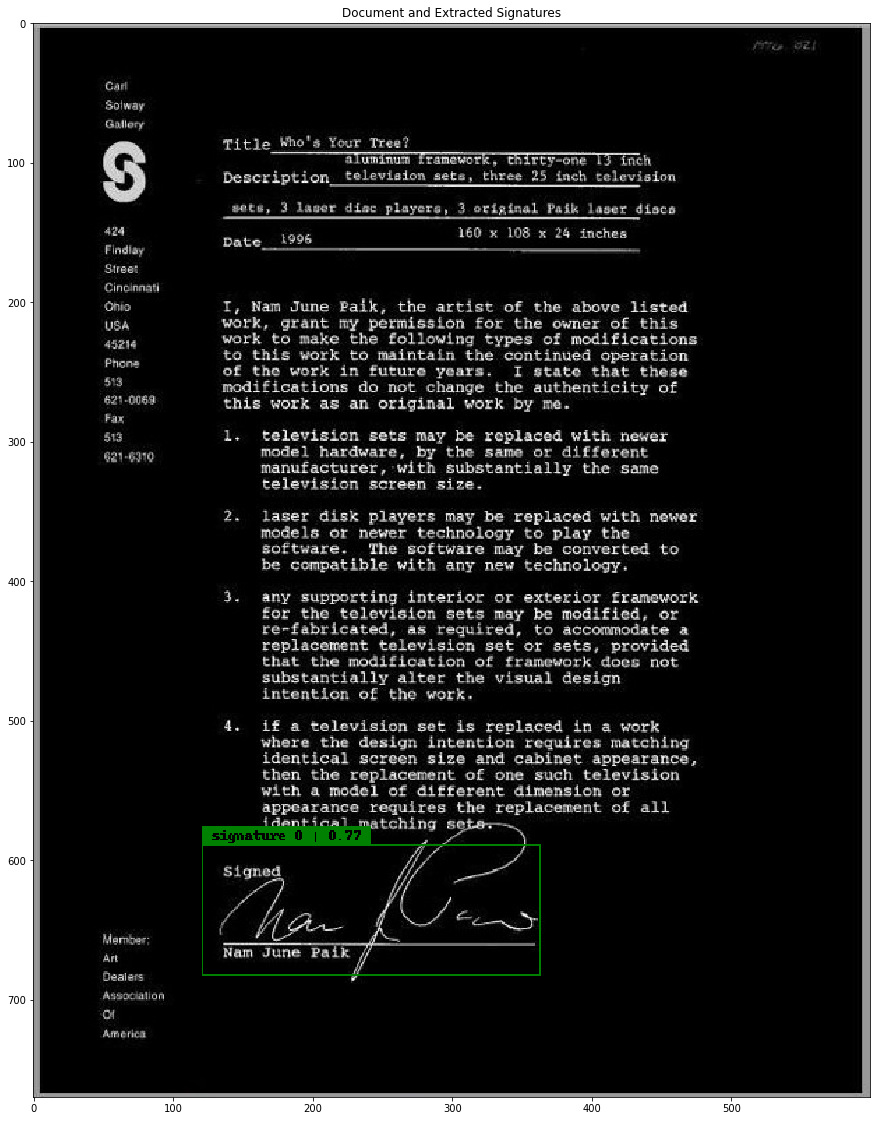

In [6]:
annotated_image = visualize_boxes(inverted_image_np, boxes, scores, threshold=0.3, color="green")
plot_np_array(annotated_image, plot_title="Document and Extracted Signatures")  

In [69]:
def plot_np_array(np_img_array, plot_title: str="Image Plot", fig_size=(15, 20), nrows=1, ncols=4):
     
    if isinstance(np_img_array, list) and len(np_img_array) ==1:
        np_img_array = np_img_array[0]
     
    if isinstance(np_img_array, list) :
        if (nrows * ncols < len(np_img_array)):
            nrows = int(len(np_img_array) / ncols)
        fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*3, nrows*2))
        for i, ax in enumerate(axs.flatten()):
            if (i < len(np_img_array)):
                ax.imshow(np_img_array[i])
        fig.suptitle(plot_title)
        fig.tight_layout()
    else:
        plt.figure(figsize=fig_size)
        plt.imshow(np_img_array, interpolation='nearest')
        plt.title(plot_title)
    plt.show()

def get_image_crops(image_np_array, bounding_boxes, scores,  threshold = 0.5):
    im_height, im_width, _ = image_np_array.shape
    crop_holder=[]
    for i in range(len(scores)):
        if scores[i] > threshold:
            bbox = bounding_boxes[i]
            ymin, xmin, ymax, xmax = int(
                bbox[0]*im_height), int(bbox[1]*im_width), int(bbox[2]*im_height), int(bbox[3]*im_width)
            crop_holder.append(image_np_array[ymin:ymax, xmin:xmax])
    return crop_holder

In [70]:
crops = get_image_crops(inverted_image_np, boxes, scores,  threshold = 0.05)

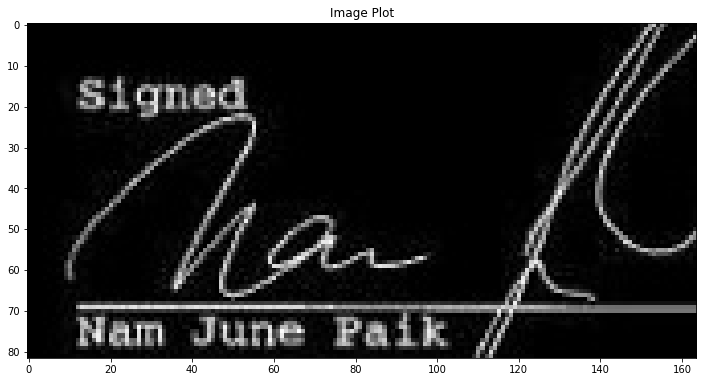

In [72]:
plot_np_array(crops[2], fig_size=(12,14), ncols=4)